In [ ]:
import pandas as pd

df = pd.read_csv('fake_bills.csv',sep=';')

In [ ]:
df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['is_genuine']= label_encoder.fit_transform(df['is_genuine'])

In [ ]:
df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
percent_missing = df.isna().sum() * 100/len(df)
df_missing = pd.DataFrame({'Column Name': df.columns,
                                 'Percent Missing': percent_missing})
df_missing

,Column Name,Percent Missing
is_genuine,is_genuine,0.000000
diagonal,diagonal,0.000000
height_left,height_left,0.000000
height_right,height_right,0.000000
margin_low,margin_low,2.466667
margin_up,margin_up,0.000000
length,length,0.000000


<Axes: >

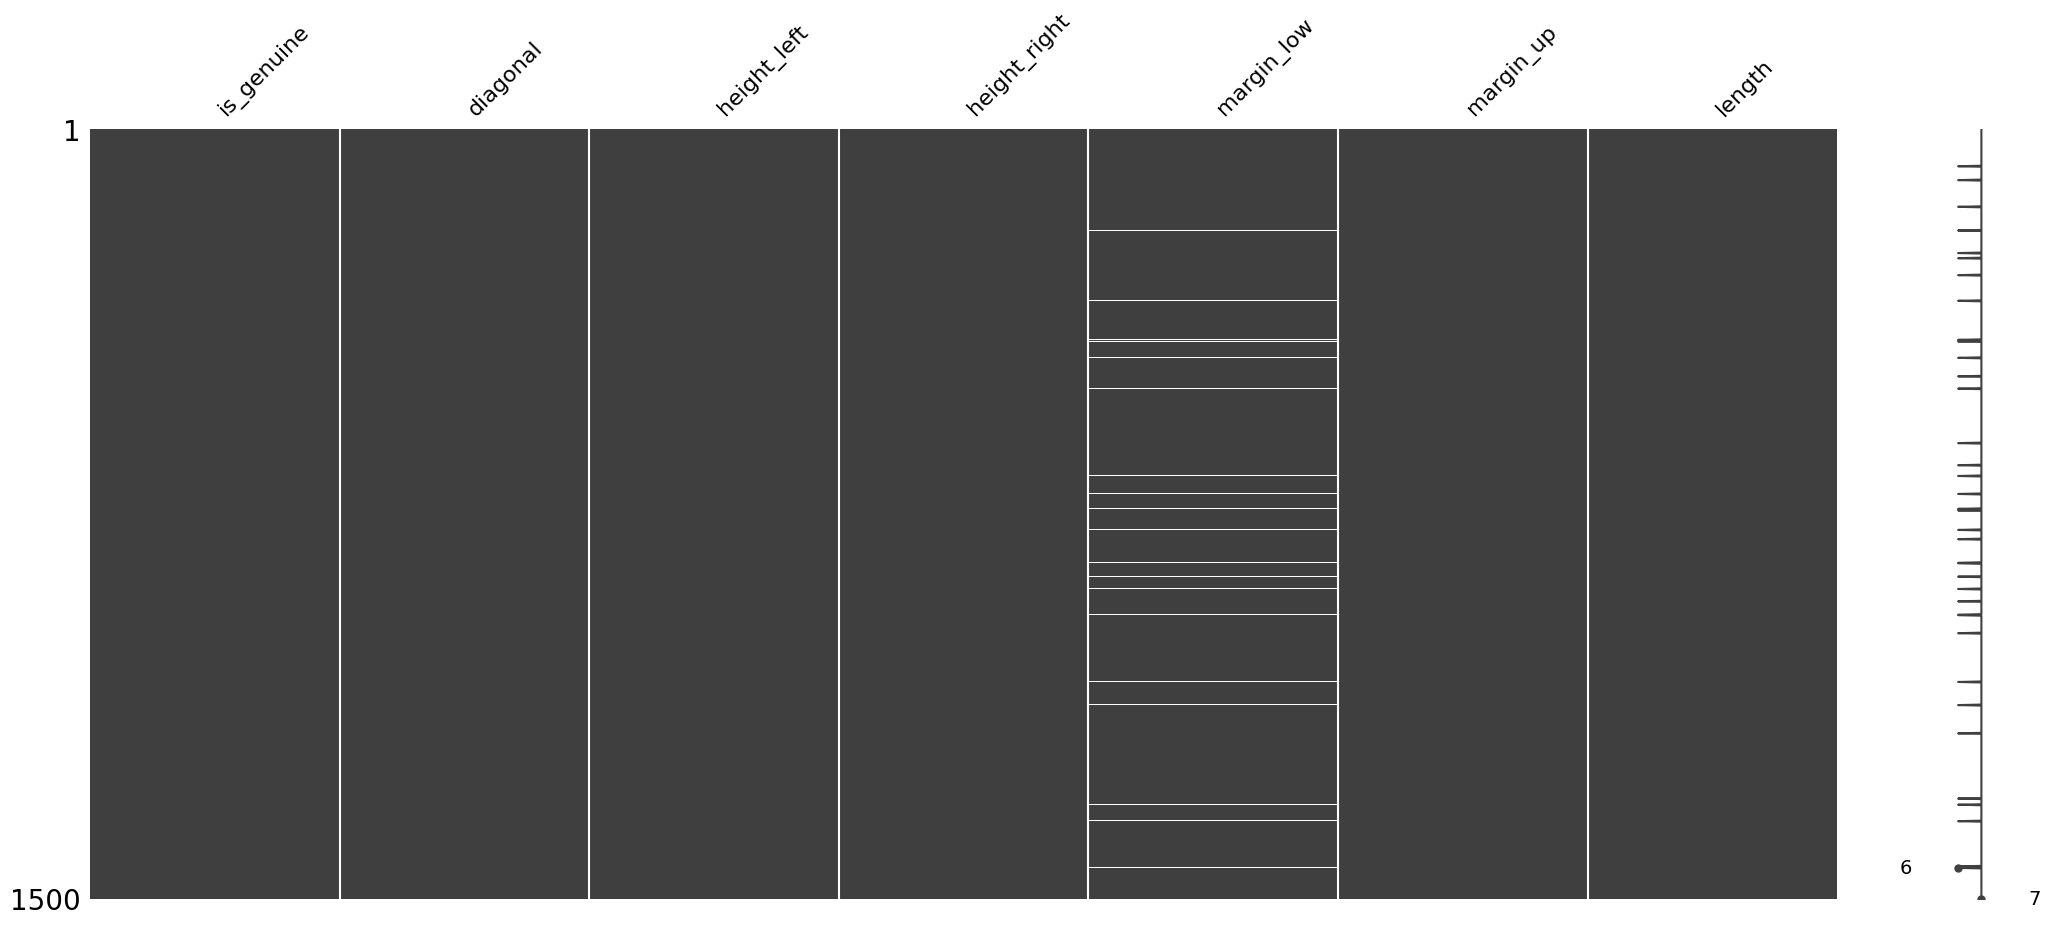

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')


In [ ]:
imp_mean.fit(df)

SimpleImputer()

In [ ]:
df2 = pd.DataFrame(imp_mean.transform(df), columns = df.columns)

In [ ]:
df2.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<Axes: >

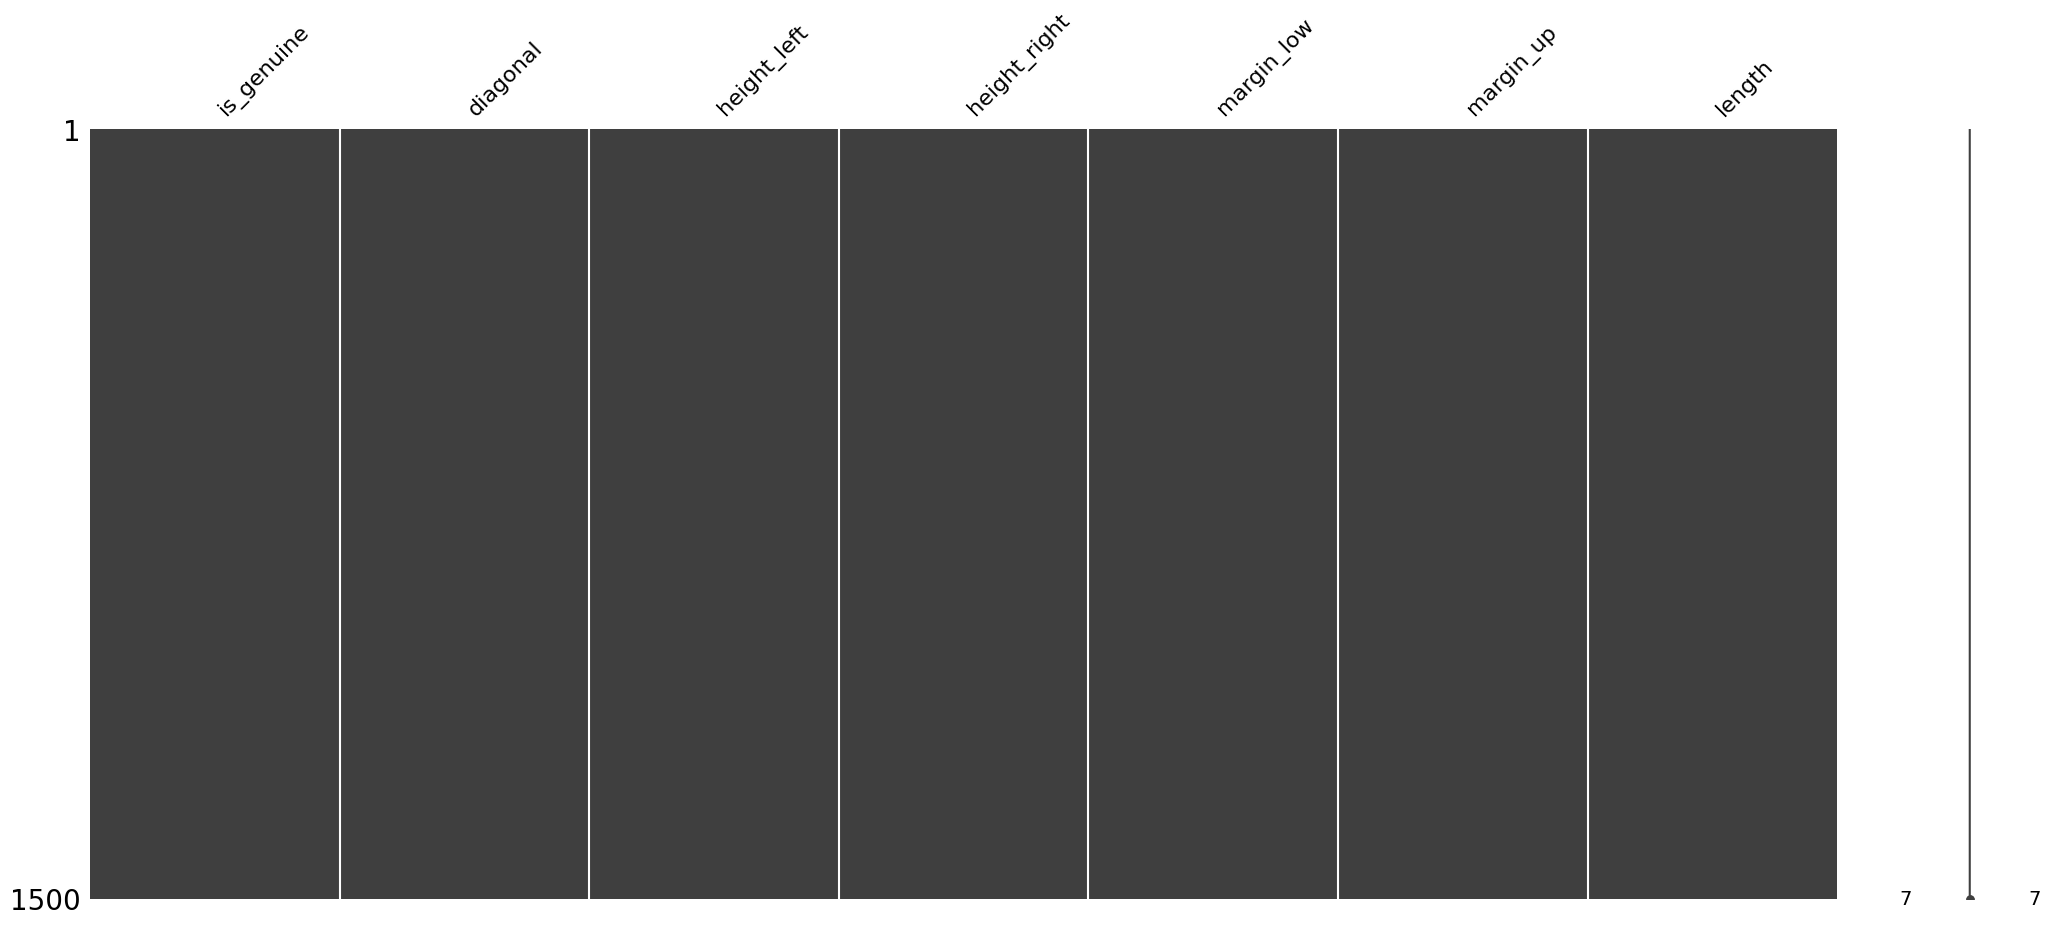

In [ ]:
msno.matrix(df2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [ ]:
x=df2.drop(['is_genuine'], axis=1)
x.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
y=df2['is_genuine']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1495    0.0
1496    0.0
1497    0.0
1498    0.0
1499    0.0
Name: is_genuine, Length: 1500, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
score_array = []
for each in range(1,16):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train,Y_train)
    y_pred = knn_loop.predict(X_test)
    result = f1_score(Y_test,y_pred,average='micro')
    cfm = confusion_matrix(Y_test,y_pred)
    score_array.append(result)
print(score_array)

[0.9833333333333333, 0.9833333333333333, 0.99, 0.9866666666666668, 0.99, 0.9866666666666668, 0.99, 0.9866666666666668, 0.99, 0.9866666666666668, 0.99, 0.99, 0.99, 0.99, 0.99]


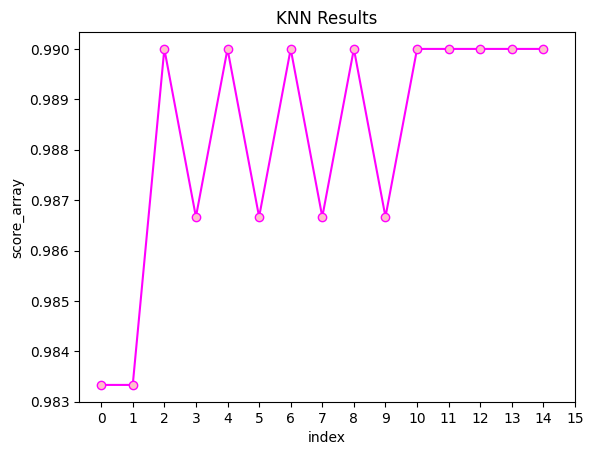

In [ ]:
plt.plot(score_array, color='magenta', marker='o',mfc='pink' )
plt.xticks(range(0,len(score_array)+1, 1))

plt.ylabel('score_array')
plt.xlabel('index')
plt.title("KNN Results")
plt.show()

<Axes: >

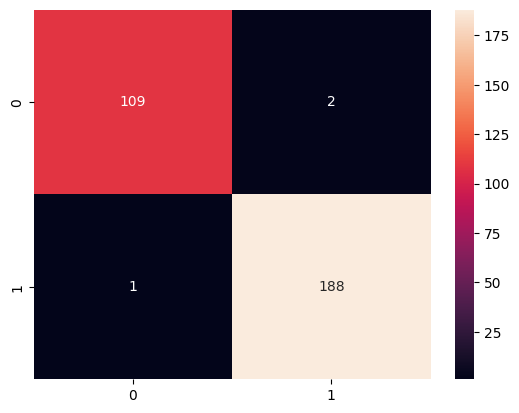

In [ ]:
import seaborn as sns
sns.heatmap(cfm, annot=True, fmt='d')

In [ ]:
cfm


array([[109,   2],
       [  1, 188]])